# Week 4: Machine learning 1

Machine learning is a technique for learning patterns in data that enable computers to make decisions and predictions. It's probably one of the hottest skills to master as a scientist or engineer in research or industry today. This week, we'll get an overview of what machine learning is, what it can be used for and what its limits are. Without worrying too much about what goes on behind the scenes, we will play around with a few classifiers in Python and test model performance using cross validation. The exercises today cover:

* Feature representation
* Model fitting
* Model evaluation
* Prediction results

## Exercises

We want to predict whether a character is a hero or a villain from information that we can extract from their markup. This is a large problem that includes some data wrangling, model fitting and a bit of evaluation. Therefore the problem is split into parts.

### Part 1: Feature representation
In it's raw format, the data cannot be given to a machine learning algorithm. What we must do is extract features from the data and put them into a structured format. This is the same as what we did when we looked at a dog (the data) and extracted into a matrix whether it was fluffy, sad looking, etc. (the features). The feature we will extract here is **team alliances**.

We can represent the team alliances of each character as a row in a matrix where each column corresponds to a particular team. That should look something like this (numbers are made up):

<img src="http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_boa.png" width="400"/>

**Note**: The following exercises relies on the dataset you produced in Ex. 3.1.2 (character markup stored on your computer). If you didn't manage to produce the dataset [use this](https://github.com/dhsvendsen/practical_data_science/tree/master/data) and go back and complete it at a later time so that you get the most out of this session.

> **Ex.4.1.1 (solved)**: Write a function called `get_alliances` that takes the name of a character and returns a list of teams that the character is allied with. Print the alliances of Scarlet Witch.
>
>*Hint: There is a place in the character markup where you'll find the team affiliations and you want to write some code that can extract that. The affiliations are not always listed the same way so you should probably try to eyeball some of the documents to get a feel for how the formatting can look.*

In [1]:
import re, os

def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character.
    
    Input
    -----
        char : str
            A valid character name of any faction
        faction : str
            Either 'heroes', 'villains', 'ambiguous' or None. If None, the function
            looks through the respective faction folders to figure out which faction
            `char` belongs to. The function is therefore FASTER if `faction` is provided
    
    Output
    ------
        out : list of strings
            List of alliance names
    """
    
    # If faction is not provided, figure out which faction it is by looping through
    # folders of character names
    if faction is None:
        for faction in ["heroes", "villains", "ambiguous"]:
            if char + ".txt" in os.listdir("../data/%s" % faction):
                break
    
    # Load character markup
    with open("../data/%s/%s.txt" % (faction, char)) as fp:
         markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"\| *alliances[\w\W]+?(?=\|.+=|\}\})", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [
        t[2:-1]
        for t in re.findall(r"\[\[.+?[\]\|\#]", alliances_field[0][10:])
        if not 'List of' in t
    ]

In [2]:
get_alliances("Scarlet Witch")

['Avengers (comics)',
 'A-Force',
 'Brotherhood of Mutants',
 'Defenders (comics)',
 'Force Works',
 'Lady Liberators',
 'Uncanny Avengers',
 'West Coast Avengers']

> **Ex.4.1.2**: Produce a **sorted** (i.e. use the ``.sort()`` method) list called `all_teams` that contains all teams in the entire Marvel universe. Print the first 10.

In [3]:
factions = ('villains', 'heroes', 'ambiguous')
characters = sorted([character[:-4] for faction in factions for character in os.listdir("../data/%s" % faction)])
all_teams_set = {alliance for character in characters for alliance in get_alliances(character)}
all_teams = sorted(list(all_teams_set))
print(all_teams[:10])
#all_teams

['#Fearsome Four', '1991 in comics', '2013 in comics', 'A-Force', 'A-Next', 'A.I. Army', 'A.R.M.O.R.', 'Acolytes (comics)', 'Action Pack (comics)', 'Advanced Idea Mechanics']


> **Ex.4.1.3**: Write a function that takes the name of a character and returns a vector representation of the team alliances for that character. The length of the returned list will be `len(all_teams)` and have 0s in the places corresponding to teams that the character is not on, and 1s in the places corresponding to teams the character is on. It may look something like:
>
>        [0, 0, 0, 0, 0, 1, 0, 0, ..., 0]
>
> Print the sum of the list returned when the input to the function is "Scarlet Witch". Show that this sum is equal to `len(get_alliances("Scarlet Witch"))`.

In [4]:
def alliance_vector(character_name, alliances_sorted):
    character_alliances = set(get_alliances(character_name))
    return [(1 if alliance in character_alliances else 0) for alliance in alliances_sorted]

vec = alliance_vector('Scarlet Witch', all_teams)
print(f'scarlet witch vec: {vec} \n sums to {sum(vec)}')

scarlet witch vec: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

> **Ex. 4.1.4**: Vectorize and save your data:
1. Create a feature matrix (a "team alliance matrix") similar in form to the matrix illustrated at the top of this notebook, in that every row corresponds to a character and every column a team. In a seperate *target* array: store whether characters are villains (denote by 0), heroes (denote by 1) or ambiguous (denote by 2). **Do not include characters that have no team alliances**. The number of rows in your feature matrix should equal the length of the target array. **Print their shapes to show that they match each other.**
2. Create a new `pandas.DataFrame` called `data` that stores all this data. Rows should be indexed with character names, columns should be indexed team names and the rightmost column should be the target array. [Here is what it should look like](https://dhsvendsen.github.io/images/BD_4_1_4_2.png) (depending on the data you were able to scrape from wikipedia). Save this dataframe as a CSV file to a local folder. Load it again and **show that it looks right** (don't use `print`!), you will need it in the coming weeks.

In [5]:
# 4.1.4.1
characters_with_alliances = sorted([character for character in characters if sum(alliance_vector(character, all_teams)) > 0])
feature_matrix = [alliance_vector(character, all_teams) for character in characters_with_alliances]
targets = [(character[:-4], faction) for faction in range(len(factions)) for character in os.listdir("../data/%s" % factions[faction])]
target_matrix = [target[1] for target in sorted(targets) if target[0] in set(characters_with_alliances)]

In [6]:
print(f'There are {len(target_matrix)} targets and {len(feature_matrix)} rows in our feature matrix')

There are 697 targets and 697 rows in our feature matrix


In [7]:
# 4.1.4.2
from pandas import DataFrame
df = DataFrame(feature_matrix, sorted(list(characters_with_alliances)), all_teams)
df['faction'] = target_matrix

f = open(f'../outputs/marvel_characters.csv', 'w')
f.write(df.to_csv())
f.close()

df

,#Fearsome Four,1991 in comics,2013 in comics,A-Force,A-Next,A.I. Army,A.R.M.O.R.,Acolytes (comics),Action Pack (comics),Advanced Idea Mechanics,...,Xavier Institute student body,Xavier's Security Enforcers,Yakuza,Young Allies,Young Allies (Marvel Comics),Young Avengers,Young Masters,Young X-Men,Zodiac (comics),faction
Abner Jenkins,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Abomination (character),0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Abraham Cornelius,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Absorbing Man,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Warlock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket (Marvel Comics),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Yo-Yo Rodriguez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Zeke Stane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zheng Zu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Part 2: Model fitting

> **Ex. 4.2.1**: Take the feature matrix and target array that you created in Ex. 4.1.4 and **remove the rows that correspond to ambiguous characters**. Now, train a classifier for predicting hero or villain on all of this data and test its accuracy on the same data you trained on.
>
>* If your team alliance matrix is `X_ta` and your target array is `y_ta` you can do this by instantiating a model like:
>
>        from sklearn.naive_bayes import BernoulliNB
>        model = BernoulliNB()
>        model.fit(X_ta, y_ta)  # <--- This is the training step
>        
> *Note:* The `BernoulliNB` is a version of the Naive Bayes classifier which associates certain features with labels and asks what the probability of a label for a data point is given its features. You are free to use any other classifier if you want. Popular ones are trees, random forests, support vector machines, feed forward neural networks, logistic regression, and the list goes on. With `sklearn`, they are just as easy to employ as the `BernoulliNB` classifier.
>
>
>1. Test the accuracy of your model. Report the *training accuracy* of your model—that is testing on the same data that you trained the model on. 
2. Which *baseline accuracy* does this model have to compete with? In other words, what accuracy would you get if you always predicted the majority class?
>
>3. Report the precision, recall and F1 scores, with respect to the **minority class**.
>
> *Hint: `model.predict(X_ta)` will give you predictions for each datapoint.*

In [20]:
# remove ambiguous characters (with alliances) from our dataframe:
ambiguous = {character[:-4] for character in os.listdir('../data/ambiguous')}
# make new feature and target matrices without rows to represent ambiguous characters
feature_matrix_no_ambiguous = [feature for (feature, name) in zip(feature_matrix, characters_with_alliances) if name not in ambiguous]
target_matrix_no_ambiguous = [faction for (faction, name) in zip(target_matrix, characters_with_alliances) if name not in ambiguous]
characters_no_ambiguous = [name for name in characters_with_alliances if name not in ambiguous]

In [9]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(feature_matrix_no_ambiguous, target_matrix_no_ambiguous)  # <--- This is the training step

BernoulliNB()

In [10]:
#4.2.1.1
predictions = model.predict(feature_matrix_no_ambiguous)
# get the number of correct predictions:
correct_guesses = sum(int(prediction == actual) for (prediction, actual) in zip(predictions, target_matrix_no_ambiguous))
training_accuracy = correct_guesses / len(feature_matrix_no_ambiguous)
print(f'Our model correctly predicts factions for {correct_guesses} characters out of {len(feature_matrix_no_ambiguous)} for a training accuracy of {training_accuracy}')

Our model correctly predicts factions for 552 characters out of 607 for a training accuracy of 0.9093904448105437


In [11]:
# 4.2.1.2
from collections import Counter
majority = Counter(target_matrix_no_ambiguous).most_common()[0]
baseline_accuracy = majority[1] / len(target_matrix_no_ambiguous)
print(f'Always choosing the majority faction yields a baseline accuracy of {baseline_accuracy}')

Always choosing the majority faction yields a baseline accuracy of 0.5238879736408567


In [12]:
#4.2.1.3
# find the minority faction:
def evaluate(predictions, actuals, match_val):
    correct_guesses = sum(int(prediction == actual) for (prediction, actual) in zip(predictions, actuals))
    accuracy = correct_guesses / len(predictions)
    min_fac = Counter(target_matrix_no_ambiguous).most_common()[-1][0]
    tp = sum(int(prediction == match_val and actual == match_val) for (prediction, actual) in zip(predictions, actuals))
    fp = sum(int(prediction == match_val and actual != match_val) for (prediction, actual) in zip(predictions, actuals))
    tn = sum(int(prediction != match_val and actual != match_val) for (prediction, actual) in zip(predictions, actuals))
    fn = sum(int(prediction != match_val and actual == match_val) for (prediction, actual) in zip(predictions, actuals))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall) 
    return (accuracy, precision, recall, f1)


min_fac = Counter(target_matrix_no_ambiguous).most_common()[-1][0]
(accuracy, precision, recall, f1) = evaluate(predictions, target_matrix_no_ambiguous, min_fac) 
message = f"""
Our model predicts the minority faction with:

training precision    {precision}
training recall       {recall}
training F1           {f1}
"""
print(message)


Our model predicts the minority faction with:

training precision    0.9642857142857143
training recall       0.8408304498269896
training F1           0.8983364140480592



### Part 3: Model evaluation

> **Ex. 4.3.1**: Investigate how well your model generalizes. You may have noticed that the performance seemed a little too good to be true in Ex 4.2.1.
1. Why did you get such a high accuracy in the previous exercise?
2. Split your data into a test and training set of equal size. Train the model only on the training set and report its accuracy and F1 score (for minority class) on both the training and test sets.
3. Comment on the difference you observe.
>
> *Hint: Watch out for unbalanced class proportions! You may want to randomly reorder the rows of your datapoints and target labels so your training and test sets have the same amount of heroes and villains.*

4.3.1.1: Our high accuracy can be explainined by our model training on the same dataset that we tested it on. To evaluate our model fairly, we must test it on data that it hasn't seen yet (ie data that it didn't train on)

In [13]:
# 4.3.1.2:
n = len(feature_matrix_no_ambiguous) // 2
training_features = feature_matrix_no_ambiguous[:n]
test_features = feature_matrix_no_ambiguous[n:]
training_targets = target_matrix_no_ambiguous[:n]
test_targets = target_matrix_no_ambiguous[n:]

split_model = BernoulliNB()
split_model.fit(training_features, training_targets)

split_model_predictions = split_model.predict(test_features)
(accuracy, precision, recall, f1) = evaluate(split_model_predictions, test_targets, min_fac) 
message = f"""
Our model predicts the minority faction with:
accuracy   {accuracy}
F1         {f1}
"""
print(message)


Our model predicts the minority faction with:
accuracy   0.8256578947368421
F1         0.7836734693877551



4.3.1.3: Our model predicts factions quite well even when it is only trained with half of the dataset. This tells us that our dataset is quite clustered. ie A portion of our dataset is representative of our dataset as a whole

> **Ex. 4.3.2**: Implement cross validation using the [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) method. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Explain how the `KFold` function (imported from `sklearn.model_selection`) works.
2. Using `KFold`, implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. Why are training accuracies consistently higher than testing accuracies (comment)?.

4.3.2.1
In its constructor, a KFold object takes an integer input for number of folds. Using the .split(data), the dataset is then split evenly into the k folds, and the indices for test and train subsets are returned.

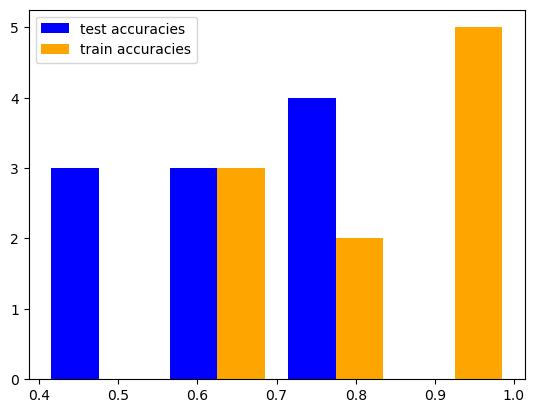

In [14]:
#4.3.2.2
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import numpy

kf = KFold(10)
test_accuracies = []
train_accuracies = []
for (test, train) in kf.split(feature_matrix_no_ambiguous):
    model = BernoulliNB()
    train_features = [feature_matrix_no_ambiguous[i] for i in train]
    train_targets = [target_matrix_no_ambiguous[i] for i in train]
    test_features = [feature_matrix_no_ambiguous[i] for i in test]
    test_targets = [target_matrix_no_ambiguous[i] for i in test]
    
    model.fit(train_features, train_targets)
    
    test_model_predictions = model.predict(test_features)
    (test_accuracy, _, _, _) = evaluate(test_model_predictions, test_targets, min_fac) 
    
    train_model_predictions = model.predict(train_features)
    (train_accuracy, _, _, _) = evaluate(train_model_predictions, train_targets, min_fac) 
    
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)

hist_bins = numpy.linspace(0.4, 1, 5)
plt.hist([test_accuracies, train_accuracies], bins=hist_bins, label=['test accuracies', 'train accuracies'], color=['blue', 'orange'])
plt.legend(loc='upper left')
plt.show()

We see training accuracies that are higher than testing accuracies because of overfitting. Our model is too specific to the dataset that it trains on. When it encounters data that it hasn't seen yet, it is not able to categorize as well.

### Part 4: Predicting good vs. evil

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data (still only heroes and villains).
* Get a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments. It produces an array with two columns, where the 1st column is the probability of class 1 (which is heroes).
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

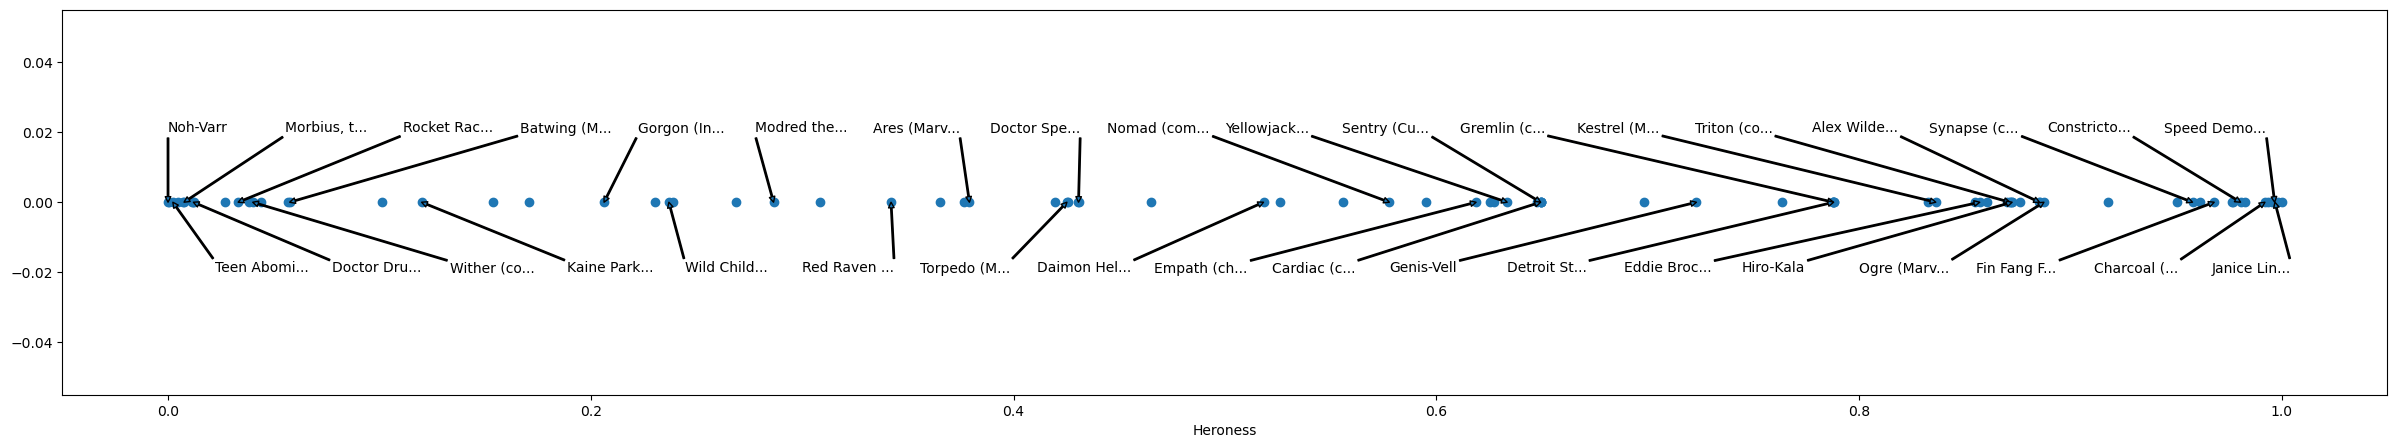

In [23]:
# get the portion of the feature matrix for the ambiguous characters:
model = BernoulliNB()
model.fit(feature_matrix_no_ambiguous, target_matrix_no_ambiguous) 
feature_matrix_ambiguous = [feature for (feature, faction) in zip(feature_matrix, target_matrix) if faction == 2]
# get the names of the ambiguous characters:
names_ambiguous = [name for (name, faction) in zip(characters_with_alliances, target_matrix) if faction == 2]
# get the names of the ambiguous characters:
heroness_ambiguous = [heroness for [heroness, villainness] in model.predict_proba(feature_matrix_ambiguous)]
plot_data = sorted(zip(heroness_ambiguous, names_ambiguous))
plt.figure(figsize=(30,5))
plt.scatter([x[0] for x in plot_data], numpy.zeros_like(heroness_ambiguous))
plt.xlabel('Heroness')
arrow_props = {
    'width': 1,
    'headwidth': 4,
    'headlength': 4,
    'shrink': 600
}
n = len(plot_data)
label_length = 10
stride = 5
# add lables on top of the graph
for i in range(0, len(plot_data), stride):
    txt = plot_data[i][1][:label_length] + ('...' if len(plot_data[i][1]) > label_length else '')
    plt.annotate(text=txt, xy=(plot_data[i][0], 0), xytext=(i * plot_data[-1][0]/n, 0.02), arrowprops=arrow_props)
# add labels underneath the graph
for i in range(stride//2, len(plot_data), stride):
    txt = plot_data[i][1][:label_length] + ('...' if len(plot_data[i][1]) > label_length else '')
    plt.annotate(text=txt, xy=(plot_data[i][0], 0), xytext=(i * plot_data[-1][0]/n, -0.02), arrowprops=arrow_props)
plt.show()

In [22]:
avg_heroness = sum(heroness_ambiguous) / len(heroness_ambiguous)
print(f'We find the average heroness for ambiguous characters to be {avg_heroness}')

We find the average heroness for ambiguous characters to be 0.5572821857982937


We notice a significant clustering on either end of the hero/villain spectrum. There seem to be a lot of ambiguous characters that are either really good or really bad (and not so many in between). These findings make sense intuitively to anyone who is familiar with the Marvel Comic Universe and its characters.

Furthermore, we find that the average heroness/villainess is slightly skewed toward heroness.